In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata("MNIST original")

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
X,y = mnist["data"], mnist["target"]

In [5]:
X.shape
#이미지는 70000개 존재함

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [8]:
#some_digit = X[360] // we can see '0' image.
some_digit=X[36000]
some_digit_image = some_digit.reshape(28,28)

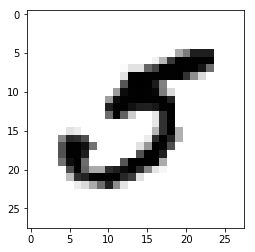

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation = 'nearest')
plt.show()

###  28x28 픽셀로 이루어져있고, 
###  X[36000]은 5와 비슷한 이미지를 갖고있다. (우리가 예측해야하기 때문에 5라는 단정은 하지 않음)

In [10]:
y[36000]

5.0

### 실제 레이블 = 5

In [11]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [12]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [14]:
import numpy as np

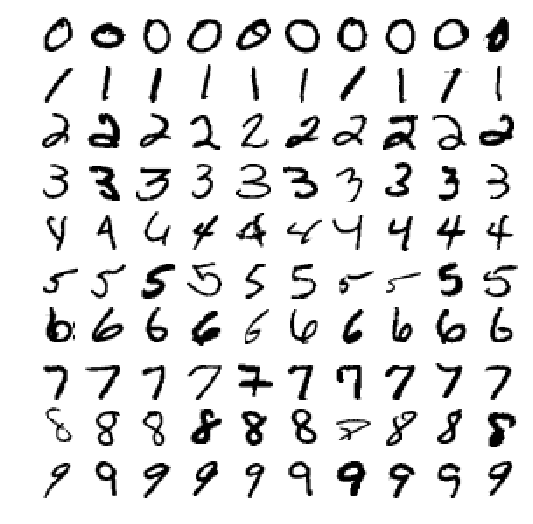

In [15]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [17]:
shuffle_index=np.random.permutation(60000)

In [18]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# 이진 분류기

- 숫자 '~'이 맞다. / 아니다. 로 분류

In [19]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

In [20]:
from sklearn.linear_model import SGDClassifier

In [21]:
sgd_clf = SGDClassifier(max_iter = 5, random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [22]:
sgd_clf.predict([some_digit])

array([False])

### 예측해보니 이미지는 5를 나타냄.

# 성능 측정

In [23]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9652, 0.9558, 0.944 ])

In [25]:
from sklearn.base import BaseEstimator

In [26]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)

In [27]:
never_5_clf = Never5Classifier()

In [29]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90995, 0.90695, 0.91205])

### 정확도 약 90%이상 (왜냐하면, dataset 중 숫자 5는 약 10%정도이기 때문에 어찌보면 당연한 결과)
### 따라서, 분류기의 성능 측정 시, 지표로 정확도는 잘 사용하지 않음

- Q. Never5Classifier는 dummy classifier라고도 하는데, 이것을 왜 쓰고, 이전것과 왜 비교하는가?

# 오차행렬

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [32]:
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [33]:
confusion_matrix(y_train_5, y_train_pred)

array([[53707,   872],
       [ 1828,  3593]])

#### 완벽한 분류기 예시 (무시해도 됨)

In [35]:
y_train_perfect_predictions = y_train_5

In [36]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

# 정밀도와 재현율

In [37]:
from sklearn.metrics import precision_score, recall_score

In [38]:
precision_score(y_train_5, y_train_pred) #5로 판별된 이미지 중 60%만 정확

0.8047032474804031

In [39]:
recall_score(y_train_5, y_train_pred) #전체 숫자 5에서 84%만 5로 감지

0.6627928426489578

In [40]:
from sklearn.metrics import f1_score

In [41]:
f1_score(y_train_5, y_train_pred)
#정밀도와 재현율을 하나의 숫자로 만듦.( 정밀도와 재현도의 조화 평균)

0.7268865061703418

In [42]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-18718.54424533])

In [43]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [44]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [45]:
#적절한 임계값(threshold) 구하기
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [46]:
y_scores.shape

(60000,)

In [47]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [48]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

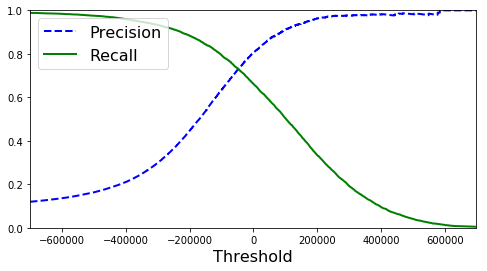

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [50]:
(y_train_pred == (y_scores > 0)).all()

True

In [51]:
y_train_pred_90 = (y_scores > 70000)
#정밀도 90% 달성이 목표일 때, threshold가 약 70000

In [52]:
precision_score(y_train_5, y_train_pred_90)

0.885689097854834

In [64]:
recall_score(y_train_5, y_train_pred_90)

0.5559859804464121

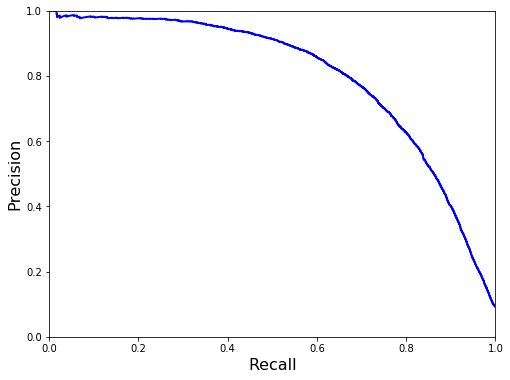

In [65]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### trade-off가 존재. 따라서, 좋은 정밀도, 재현율 지점 =하강점 직전

# ROC 곡선

In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

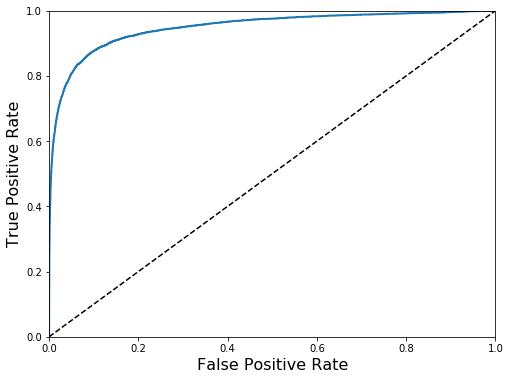

In [56]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


### 점선은 완전한 랜덤분류기의 ROC곡선. 좋은 분류기는 왼쪽 위 모서리처럼 점선으로부터 멀리떨어져있어야 함.

In [57]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9484749287108246

In [58]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [59]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

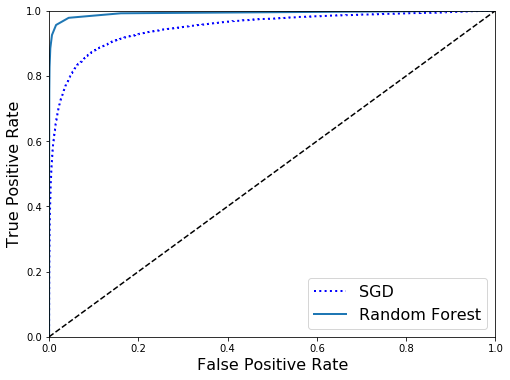

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [61]:
roc_auc_score(y_train_5, y_scores_forest)

0.9924242975001292

In [62]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9870044052863436

In [63]:
recall_score(y_train_5, y_train_pred_forest)

0.8266002582549346

# MultiClass Classification

In [66]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

In [67]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores
#클래스마다 점수 호출, 가장 높은 점수가 값에 해당

array([[-154880.9248471 , -420694.0179262 , -135611.85544395,
         -43246.6337104 , -272724.81676075,  -18718.54424533,
        -510280.34199797, -238910.36987721, -527059.64225378,
        -755783.60401228]])

In [68]:
np.argmax(some_digit_scores)

5

In [69]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [70]:
sgd_clf.classes_[5]

5.0

In [76]:
#강제로 OvO, OvA 제어
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/home/jaerim/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jaerim/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jaerim/.local/li

/home/jaerim/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jaerim/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jaerim/.local/li

/home/jaerim/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jaerim/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jaerim/.local/li

array([5.])

In [77]:
len(ovo_clf.estimators_)

45

In [78]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [79]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.1, 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [80]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88772246, 0.86259313, 0.85617843])

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
#스케일 조정하여 더 높은 값 얻음

array([0.91016797, 0.9099455 , 0.90763615])

In [82]:
#오차행렬 확인
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5747,    2,   17,    9,   10,   40,   45,    9,   39,    5],
       [   1, 6474,   48,   22,    5,   37,    9,   10,  121,   15],
       [  54,   41, 5331,  106,   73,   27,   83,   59,  168,   16],
       [  50,   39,  134, 5347,    2,  230,   32,   62,  135,  100],
       [  23,   25,   39,    8, 5347,   10,   56,   39,   70,  225],
       [  73,   45,   32,  190,   62, 4598,  116,   29,  173,  103],
       [  38,   23,   54,    2,   40,   85, 5618,    9,   49,    0],
       [  28,   19,   70,   30,   55,    8,    5, 5789,   18,  243],
       [  55,  164,   69,  148,   14,  144,   58,   29, 5019,  151],
       [  45,   37,   27,   86,  163,   35,    1,  201,   69, 5285]])

In [83]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

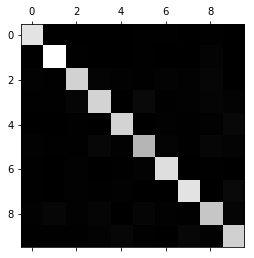

In [84]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### 배열에서 가장 큰 값은 흰색으로 작은값은 검정색으로
### 대각선이 흰색인것으로 보아 잘 분류됨
### 5가 다른 숫자보다 어두워보이는데 이는 숫자5의 이미지가 적거나 다른 숫자만큼 분류 불가

In [85]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

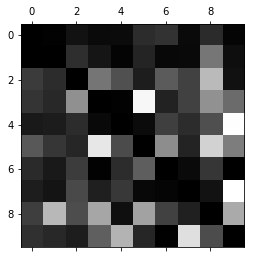

In [86]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
#8,9열이 상대적으로 밝음 = 많은 이미지가 8과 9로 잘못 분류
#8,9행도 상대적으로 밝음 = 다른 숫자들과 혼돈이 자주 됨

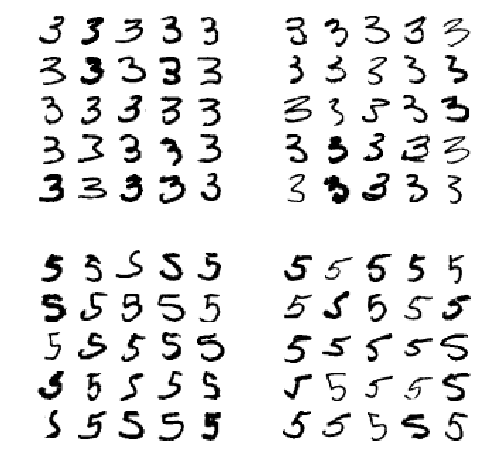

In [87]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# Multi Label Classification

In [88]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [89]:
knn_clf.predict([some_digit])
#숫자 5는 크지 않고, 홀수이다.

array([[False,  True]])

In [ ]:
_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

# Multi Output Classification

- 한 레이블이 다중 클래스가 될 수 있도록 하는 것

In [90]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

# noise 제거 

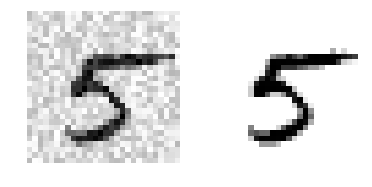

In [91]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()